## Sigmoid函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

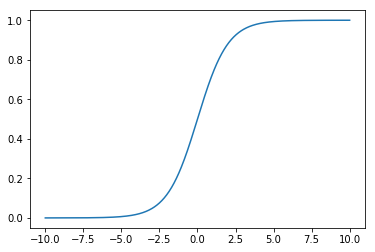

In [3]:
x = np.linspace(-10, 10, 500)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

## 实现逻辑回归

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
iris = datasets.load_iris()

In [6]:
x = iris.data
y = iris.target

In [7]:
X = x[y < 2, :2]
y = y[y < 2]

In [8]:
X.shape

(100, 2)

In [9]:
y.shape

(100,)

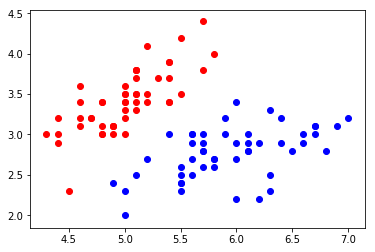

In [10]:
plt.scatter(X[y == 0, 0],X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.show()

### 使用逻辑回归

In [11]:
from kNN.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, seed = 666)

In [12]:
from kNN.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [13]:
log_reg.score(X_test, y_test)

1.0

In [14]:
log_reg.predict_proba(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.17601199, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [15]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [16]:
log_reg.coef_

array([ 3.01796521, -5.04447145])

In [17]:
log_reg.intercept_

-0.6937719272911225

In [18]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.intercept_) / log_reg.coef_[1]

In [19]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

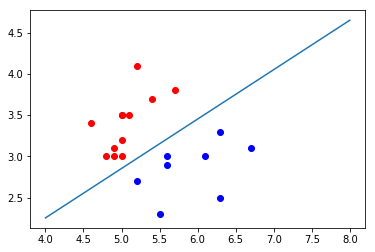

In [22]:
plt.plot(x1_plot, x2_plot)
plt.scatter(X_test[y_test == 0, 0],X_test[y_test==0, 1], color='r')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color='b')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


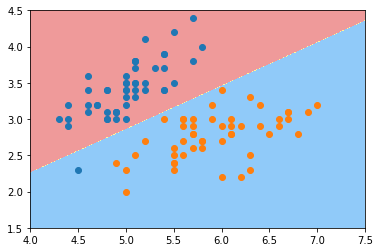

In [25]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()


## kNN的决策边界

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
knn_clf.score(X_test, y_test)

1.0

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


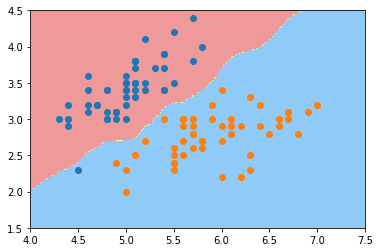

In [29]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [30]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


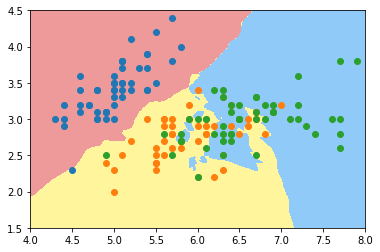

In [31]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

In [38]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


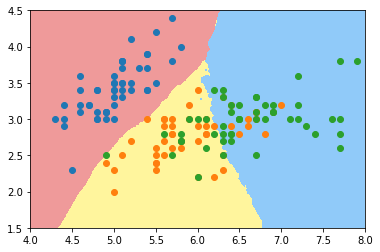

In [39]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

## 逻辑回归中添加多项式特征

In [40]:
import numpy as np

In [41]:
import matplotlib.pyplot as plt

In [44]:
np.random.seed(666)
X = np.random.normal(0,1,size=(200,2))
y = np.array(X[:,0]**2 + X[:,1]**2 < 1.5, dtype='int')

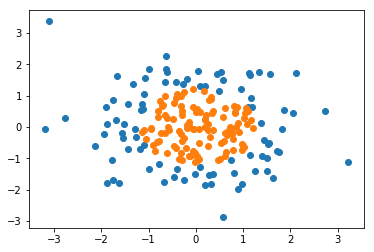

In [45]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## 使用逻辑回归

In [46]:
from kNN.LogisticRegression import LogisticRegression

In [47]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [48]:
log_reg.score(X,y)

0.605

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


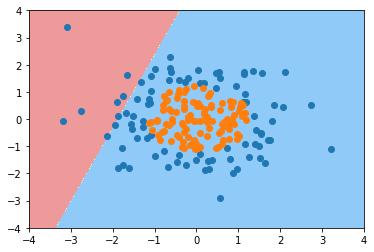

In [49]:
plot_decision_boundary(log_reg, axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [51]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression())])

In [52]:
poly_log_reg.score(X, y)

0.95

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


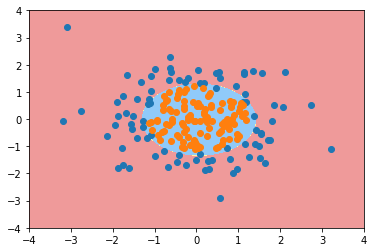

In [53]:
plot_decision_boundary(poly_log_reg, axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [58]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression())])

In [59]:
poly_log_reg2.score(X, y)

0.955

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


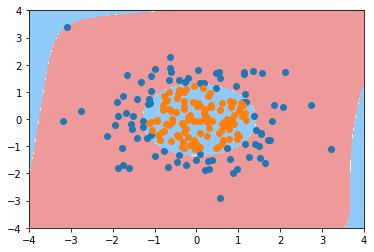

In [60]:
plot_decision_boundary(poly_log_reg2, axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()